In [1]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM, MLPClassifier

import matplotlib.pyplot as plt

In [2]:
data = load_digits()

In [3]:
data.data.min(), data.data.max()

(0.0, 16.0)

In [4]:
X,y = data.data, data.target
X = (X>7)*1

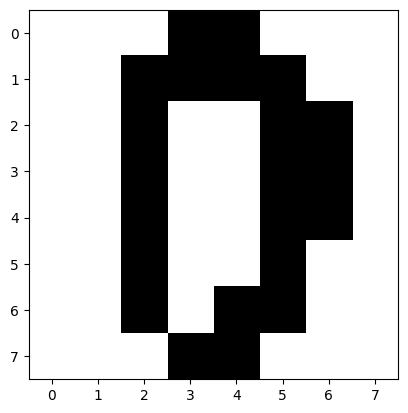

In [5]:
plt.imshow((data.images[0]>7)*1, cmap="binary")

In [6]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=13)

In [8]:
rbm = BernoulliRBM( learning_rate=0.05, n_iter=100).fit(X_train, y_train)

In [9]:
clf = Pipeline([
    ("rbm_1", rbm),
    ("clf", MLPClassifier(max_iter=500))
]).fit(X_train, y_train)

In [10]:
clf.score(X_train, y_train)

1.0

In [11]:
clf.score(X_test, y_test)

0.9592592592592593

In [12]:
rbm_2 = BernoulliRBM(n_components=128, learning_rate=0.05, n_iter=100).fit(
    rbm.transform(X_train), y_train
)

In [19]:
from sklearn.metrics import matthews_corrcoef, ConfusionMatrixDisplay, confusion_matrix

In [20]:
matthews_corrcoef(y_test, clf.predict(X_test))

0.9320735171586186

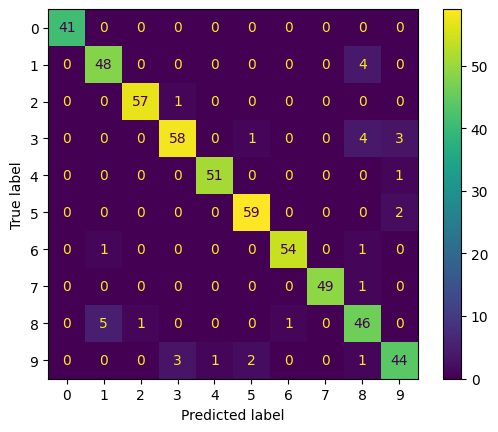

In [21]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test, clf.predict(X_test))
).plot()